<h1>Car pricing predictor</h1>

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Exploration

In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.drop(columns = ['car_ID','symboling'], inplace = True)

In [8]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
#Vamos a separar y obtener solo la marca, por eso primero lo converti en string
#Luego le doy split y le digo que lo separe por el espacio
#expand le pone una columna independiente a cada dat0
#[0] le digo que solo conserve la primera que es el nombre de la marca
df['CarName'] = df['CarName'].str.split(' ', expand=True)[0]

In [11]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

###### Se observan typos o repetidos diferentes -> maxda, mazda, nissan, Nissan etc

In [12]:
df['CarName'] = df['CarName'].replace({'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})

In [13]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

# Data Visualization

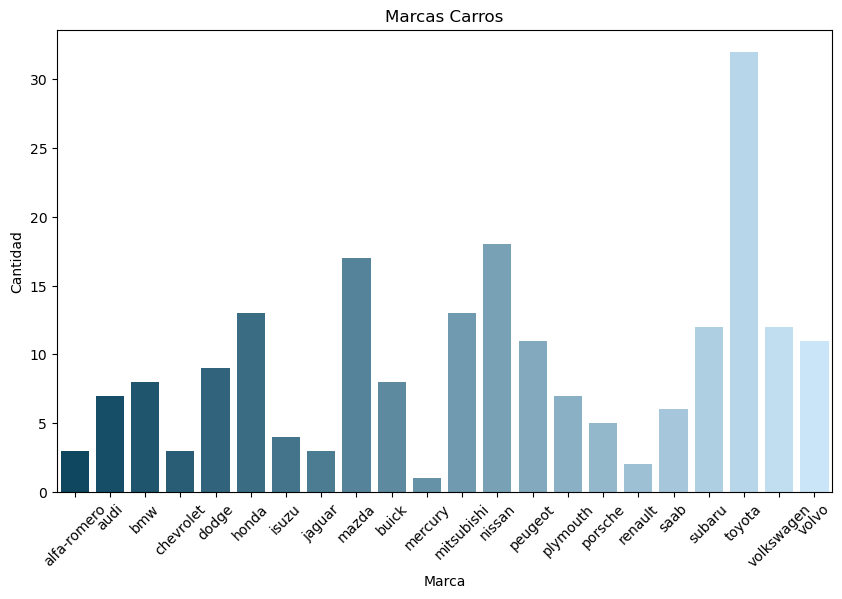

In [15]:
fig, ax1 = plt.subplots(figsize=(10,6))
#plt.figure(figsize=(10,10))
ax1.set_title('Marcas Carros')
sns.countplot(data = df, x='CarName', palette=sns.blend_palette(['#004c6d','#c1e7ff'],22))
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.xlabel('Marca')
plt.show()

<Figure size 1000x1000 with 0 Axes>

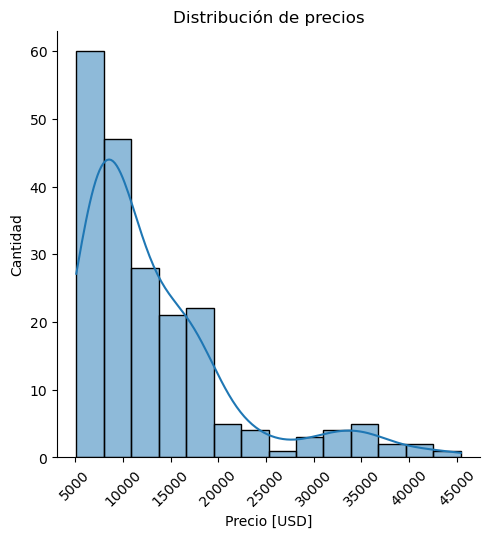

In [16]:
plt.figure(figsize=(10,10))
sns.displot(data=df, x=df['price'], kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio [USD]')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.show()

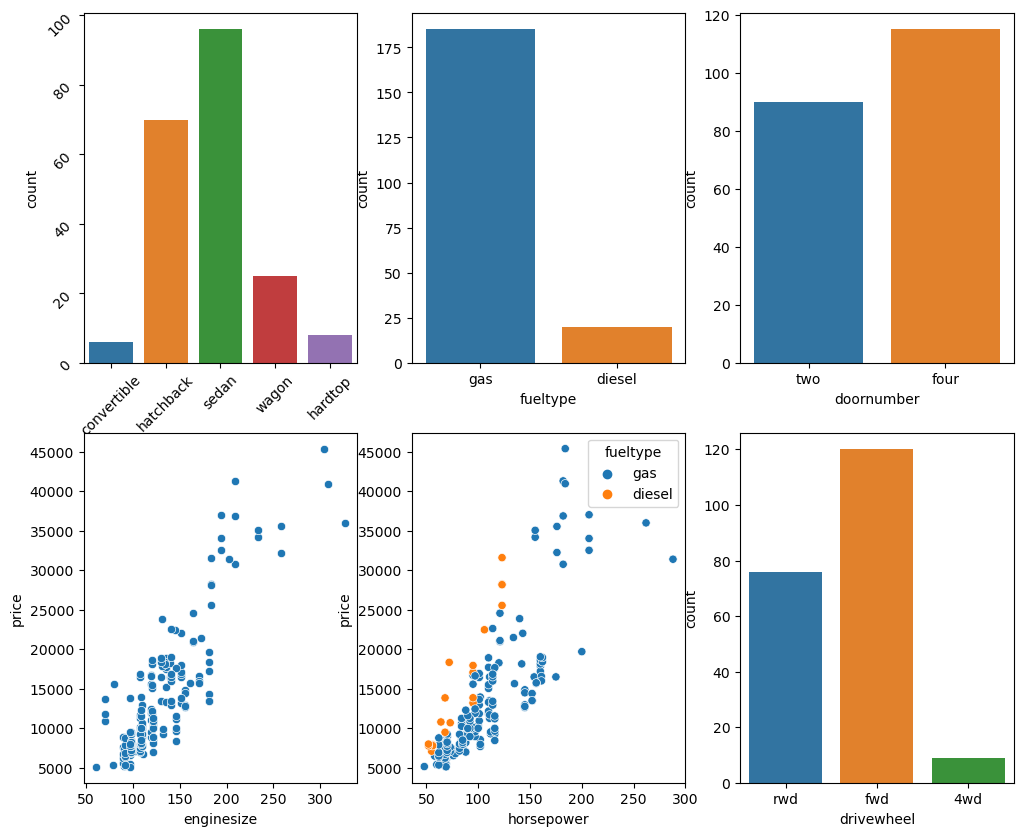

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
#Figure 1
sns.countplot(ax=axes[0,0], data=df, x='carbody')
axes[0,0].tick_params(labelrotation=45)
#Figure 2
sns.countplot(ax=axes[0,1], data=df, x='fueltype')
#Figure 3
sns.countplot(ax=axes[0,2], data=df, x='doornumber')
#Figure 4
sns.scatterplot(ax=axes[1,0], data=df, x='enginesize', y='price')
#Figure 5
sns.scatterplot(ax=axes[1,1], data=df, x='horsepower', y='price', hue='fueltype')
#Figure 6
sns.countplot(ax=axes[1,2], data=df, x='drivewheel')
plt.show()

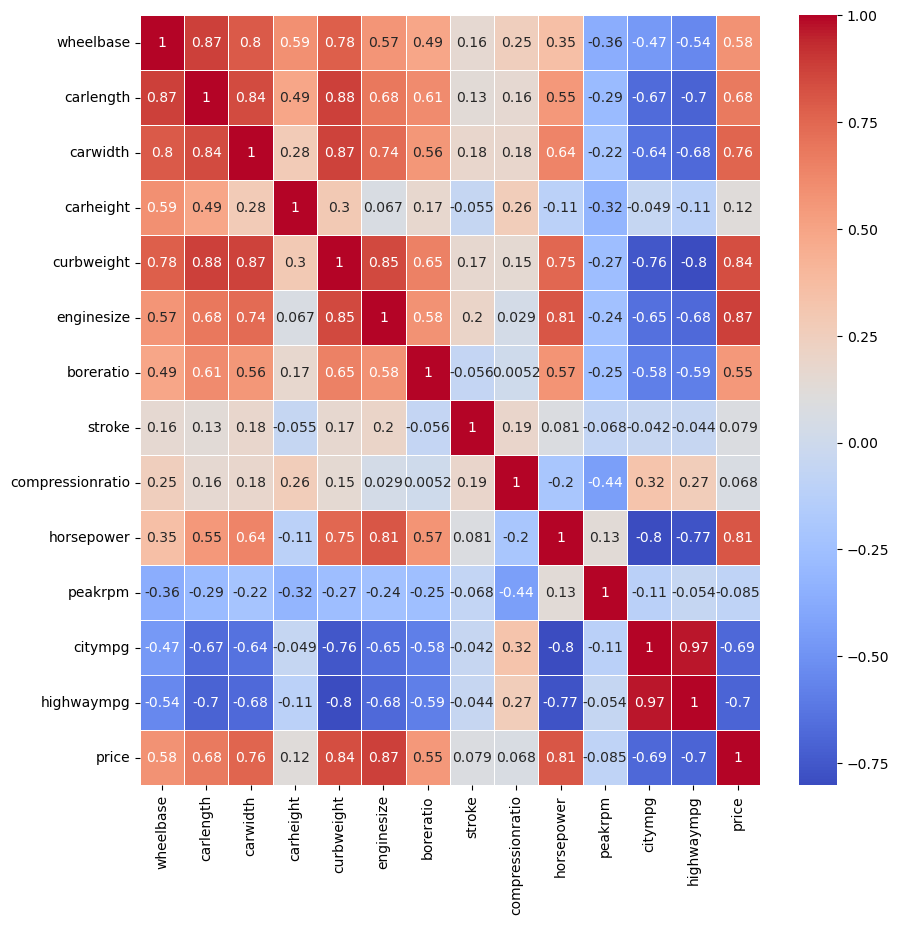

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.show()

### Modelo de regresión lineal

#### Unica variable

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

###### Predecir el precio con el enginesize

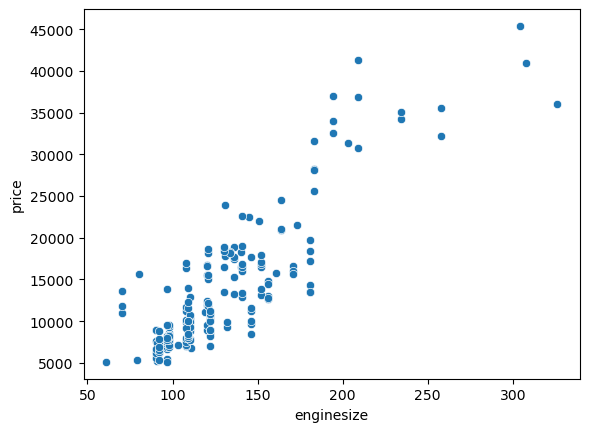

In [24]:
sns.scatterplot(data=df, x='enginesize', y='price')
plt.show()

In [29]:
#Dividir los datos entre entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(df['enginesize'], df['price'],
                                                   test_size = 0.25, random_state=42)

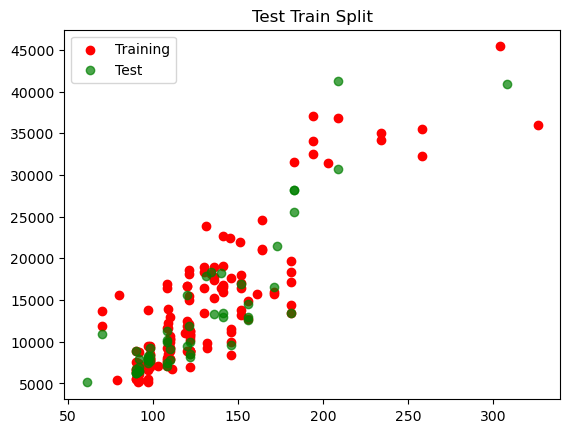

In [32]:
#Visualizar data entreno
plt.scatter(x_train, y_train,c='red', marker='o', label='Training')
plt.scatter(x_test, y_test, c='green', marker='o', label='Test', alpha=0.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [33]:
#Crear el modelo lineal y entrenarlo
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

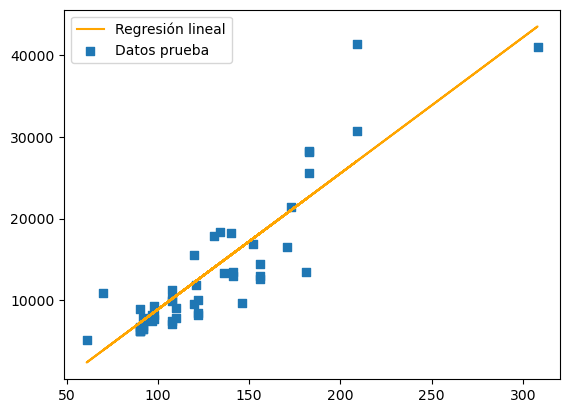

In [39]:
#Usar el modelo para predecir
y_predict = LR.predict(x_test.values.reshape(-1,1))

#Graficar el resultado
plt.plot(x_test, y_predict, label='Regresión lineal', color='orange')
plt.scatter(x_test, y_test, label='Datos prueba', marker='s')
plt.legend()
plt.show()

In [55]:
#Probar el modelo con un dato indep
def precio(engine_value):
    price_pred = round(LR.predict(np.array([[engine_value]]))[0],1)
    return(price_pred)
#round(LR.predict(np.array([[150]]))[0],1)
precio(150)

17215.2

In [53]:
#MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = round(mean_squared_error(y_test, y_predict),1)
#R2
r2 = r2_score(y_test, y_predict)
print(f'El r2: {r2} y el MSE es {mse}')

El r2: 0.7952036346149267 y el MSE es 13856427.2


###### Con valores estandarizados

In [66]:
#Estandarizando los valores
from sklearn.preprocessing import StandardScaler

x1 = df['enginesize'].values.reshape(-1,1)
y1 = df['price'].values.reshape(-1,1)
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x1)
y_std = sc_y.fit_transform(y1)

In [67]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_std, y_std,
                                                   test_size = 0.25, random_state=42)

slr = LinearRegression()
slr.fit(x1_train, y1_train)

LinearRegression()

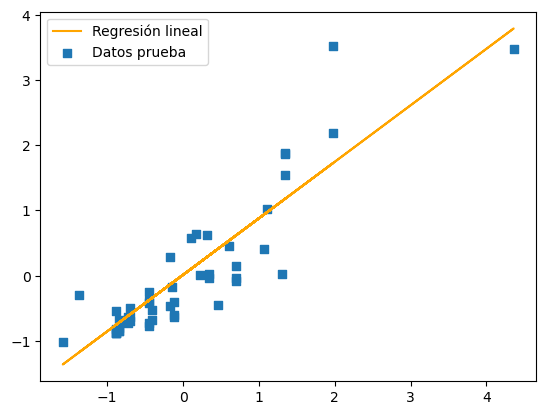

In [70]:
y1_predict = slr.predict(x1_test)

plt.plot(x1_test, y1_predict, label='Regresión lineal', color='orange')
plt.scatter(x1_test, y1_test, label='Datos prueba', marker='s')
plt.legend()
plt.show()

In [71]:
r2 = r2_score(y1_test, y1_predict)
print(f'El r2: {r2}')

El r2: 0.7952036346149266


### Regresión multivariable

In [94]:
#Usaremos 3 variables: enginesize, curbweight, y highwaympg -> Negativa (Me reduce el r2 entonces lo quite)

x_mult = df[['enginesize','curbweight']].values
y_mult = df['price'].values.reshape(-1,1)

In [95]:
#Separar los datos
xm_train, xm_test, ym_train, ym_test = train_test_split(x_mult, y_mult,
                                                   test_size = 0.25, random_state=42)

In [96]:
#Entrenar el modelo
MLR = LinearRegression()
MLR.fit(xm_train, ym_train)

LinearRegression()

In [97]:
#Predecir datos
ym_predict = MLR.predict(xm_test)

In [98]:
r2_mult = r2_score(ym_test, ym_predict)
print(f'El r2: {r2_mult}')

El r2: 0.8217343073670772


In [145]:
xm_test[5]

array([  97, 2028], dtype=int64)

In [146]:
MLR.predict([[150, 3100]])

array([[18707.17460295]])

In [165]:
def multiple_pred(engine, cubr_weight):
    stimated_price = round(MLR.predict([[engine, cubr_weight]])[0][0], 1)
    return(stimated_price)

In [166]:
multiple_pred(170, 2500)

17968.0